In [1]:
!pip install gdown

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import gdown
import pandas as pd
file_id =  "1i4ia9ZNfAXgu6JGTXCUgFn7Pb8wltzLH"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_file = "acko_dataset.csv"
gdown.download(download_url, output_file, quiet=False)
data = pd.read_csv(output_file)


Downloading...
From (original): https://drive.google.com/uc?id=1i4ia9ZNfAXgu6JGTXCUgFn7Pb8wltzLH
From (redirected): https://drive.google.com/uc?id=1i4ia9ZNfAXgu6JGTXCUgFn7Pb8wltzLH&confirm=t&uuid=c4c1af3d-17f3-4ea0-accc-3e8ec9ac8f0d
To: c:\Users\rajan\OneDrive\Python\Final_Project_NextLeap\acko_dataset.csv
100%|██████████| 219M/219M [00:29<00:00, 7.40MB/s] 


In [3]:
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Woman,8.642140e+05,Spouse Present,1.0,Undergraduate,Business,26.598761,Tier-1,Premium,2.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,Detached Home,1945.913327
1,1,39.0,Woman,8.927012e+05,Spouse Present,3.0,Post Graduate,Missing,21.569731,Tier-2,Comprehensive,1.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,Detached Home,10908.896072
2,2,23.0,Man,2.201772e+06,Formerly Married,3.0,Undergraduate,Business,50.177549,Tier-3,Premium,1.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,Detached Home,21563.135198
3,3,21.0,Man,3.997542e+06,Spouse Present,2.0,Undergraduate,Missing,16.938144,Tier-2,Basic,1.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Flat,2653.539143
4,4,21.0,Man,3.409986e+06,Not Married,1.0,Undergraduate,Business,24.376094,Tier-2,Premium,0.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,Detached Home,1269.243463


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1200000 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            1200000 non-null  object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def calcualte_info (parameters):
    a=parameters.mean()
    b=min(parameters)
    c=max(parameters)
    d=parameters.nunique()
    e=parameters.unique()
    print(f"Mean is: {a}")
    print(f"Minimum is: {b}")
    print(f"Maximum is: {c}")
    print(f"Unique count is: {d}")
    #pd.DataFrame(print(f"Unique value is: {e}"))
    pd.DataFrame(e)
    #return(a,b,c,d,e)
calcualte_info(data['Premium Amount'])

Mean is: 25763.41142394362
Minimum is: 292.65005896500105
Maximum is: 240000.0
Unique count is: 784492


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1200000 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            1200000 non-null  object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-

In [8]:
# Count missing values in the 'ID' column
missing_count = data['Premium Amount'].isna().sum()

print(f"Number of missing values in 'Premium Amount' column: {missing_count}")


Number of missing values in 'Premium Amount' column: 415032


Data Cleanup:

1. Handling Missing Values

In [9]:
#Age 18,705 missing - moderate impact - replacing the missing data with median that would be less sensitive to outliers
data['Age'].fillna(data['Age'].median(), inplace=True)

#Annual Income 44,949 missing values - High Impact - replacing with median
data['Annual Income'].fillna(data.groupby('Occupation')['Annual Income'].transform('median'), inplace=True)

# Number of Dependents 109,672 missing - Moderate Impact - since this is discrete so replacing this by mode
data['Number of Dependents'].fillna(data['Number of Dependents'].mode()[0], inplace=True)

#Health Score 74,076 missing - High Impact
data['Health Score'].fillna(data.groupby('Age')['Health Score'].transform('median'), inplace=True)

#Previous Claims 364,029 missing  new customers with no claims history - High Impact - replacing nan with 0 assuming no claim
data['Previous Claims'].fillna(0, inplace=True)

#Credit Score (137,882 missing) - High Impact
data['Credit Score'].fillna(data['Credit Score'].median(), inplace= True)

#Customer Feedback 77,824 missing - Moderate Impact
data['Customer Feedback'].fillna('Unknown', inplace=True)

#Premium Amount 415,032 missing - CRITICAL Issue - estimated with other factors
data['Premium Amount'].fillna(data.groupby(['Policy Type', 'Age'])['Premium Amount'].transform('median'), inplace=True)

print(data.isnull().sum())



C:\Users\rajan\AppData\Local\Temp\ipykernel_13208\1048913003.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\rajan\AppData\Local\Temp\ipykernel_13208\1048913003.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Credit Score            0
Insurance Duration      1
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64


2. Handling categorical Data

-Converting categorical variables into numerical values to be used in the pricing formula.

In [10]:
# Binary Encoding
data['Gender_Num'] = data['Gender'].map({'Woman': 0, 'Man': 1})
data['Smoking_Status_Num'] = data['Smoking Status'].map({'No': 0, 'Yes': 1})

# Ordinal Encoding
data['Education_Level_Num'] = data['Education Level'].map({'Secondary Education': 1, 'Undergraduate': 2, 'Post Graduate': 3, 'PhD': 4})
data['Exercise_Frequency_Num'] = data['Exercise Frequency'].map({'Rarely': 0, 'Monthly': 1, 'Weekly': 2, 'Daily': 3})
data['Customer_Feedback_Num'] = data['Customer Feedback'].map({'Poor': 0, 'Average': 1, 'Good': 2, 'Unknown': 1})

# Define mappings
occupation_mapping = {'Full-Time Worker': 3, 'Business': 2, 'Not Currently Working': 1, 'Missing': 0}
location_mapping = {'Tier-1': 3, 'Tier-2': 2, 'Tier-3': 1}
property_mapping = {'Detached Home': 3, 'Flat': 2, 'Apartment': 1}
policy_mapping = {'Basic': 1, 'Comprehensive': 2, 'Premium': 3}

# Apply ordinal encoding in new columns
data['Occupation_Num'] = data['Occupation'].map(occupation_mapping)
data['Location_Num'] = data['Location'].map(location_mapping)
data['Property_Type_Num'] = data['Property Type'].map(property_mapping)
data['Policy_Type_Num'] = data['Policy Type'].map(policy_mapping)


In [11]:
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Premium Amount,Gender_Num,Smoking_Status_Num,Education_Level_Num,Exercise_Frequency_Num,Customer_Feedback_Num,Occupation_Num,Location_Num,Property_Type_Num,Policy_Type_Num
0,0,19.0,Woman,8.642140e+05,Spouse Present,1.0,Undergraduate,Business,26.598761,Tier-1,...,1945.913327,0,0,2,2,0,2,3,3,3
1,1,39.0,Woman,8.927012e+05,Spouse Present,3.0,Post Graduate,Missing,21.569731,Tier-2,...,10908.896072,0,1,3,1,1,0,2,3,2
2,2,23.0,Man,2.201772e+06,Formerly Married,3.0,Undergraduate,Business,50.177549,Tier-3,...,21563.135198,1,1,2,2,2,2,1,3,3
3,3,21.0,Man,3.997542e+06,Spouse Present,2.0,Undergraduate,Missing,16.938144,Tier-2,...,2653.539143,1,1,2,3,0,0,2,2,1
4,4,21.0,Man,3.409986e+06,Not Married,1.0,Undergraduate,Business,24.376094,Tier-2,...,1269.243463,1,1,2,2,0,2,2,3,3


3. Handling Outliers: handling the outliers here for better analysis

In [12]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Checking outliers for key numerical columns
outlier_columns = ['Age', 'Annual Income', 'Health Score', 'Credit Score', 'Premium Amount']
outliers = {col: detect_outliers_iqr(data, col) for col in outlier_columns}

# Count the number of outliers per column
outlier_counts = {col: len(outliers[col]) for col in outlier_columns}
print(outlier_counts)


{'Age': 0, 'Annual Income': 117342, 'Health Score': 0, 'Credit Score': 0, 'Premium Amount': 126512}


In [13]:
# Capping outliers
for col in outlier_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Apply capping
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])


Applying Min-Max Scaling in Code beacause this will help to Incorrect weightage for pricing model

In [14]:
#Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Define numerical columns from the original dataset
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Previous Claims', 'Credit Score', 'Premium Amount']

# Define encoded categorical columns (newly created)
encoded_cols = ['Gender_Num', 'Smoking_Status_Num', 'Education_Level_Num', 'Exercise_Frequency_Num', 
                'Customer_Feedback_Num', 'Occupation_Num', 'Location_Num', 'Property_Type_Num', 'Policy_Type_Num']

# Combine both lists for scaling
scale_cols = numerical_cols + encoded_cols

# Apply MinMax Scaling and store in new columns
data[[col + '_scaled' for col in scale_cols]] = scaler.fit_transform(data[scale_cols])



In [15]:
#cheking the missing value, data types and basic statistics such as scaling and outlier
# Check if any missing values remain
print(data.isnull().sum())

# Check the final dataset information
#
print(data.info())

# Display final dataset statistics
print(data.describe().T)

id                               0
Age                              0
Gender                           0
Annual Income                    0
Marital Status                   0
Number of Dependents             0
Education Level                  0
Occupation                       0
Health Score                     0
Location                         0
Policy Type                      0
Previous Claims                  0
Credit Score                     0
Insurance Duration               1
Policy Start Date                0
Customer Feedback                0
Smoking Status                   0
Exercise Frequency               0
Property Type                    0
Premium Amount                   0
Gender_Num                       0
Smoking_Status_Num               0
Education_Level_Num              0
Exercise_Frequency_Num           0
Customer_Feedback_Num            0
Occupation_Num                   0
Location_Num                     0
Property_Type_Num                0
Policy_Type_Num     

segmenting customers based on key risk factors that impact insurance pricing. Here’s a proposed segmentation:
1. Health-Based Segmentation
2.  Financial-Based Segmentation
3. Lifestyle-Based Segmentation
4. Age-Based Segmentation
Then will assign the risk Scores to Each Customer
Low Risk = 1, Medium Risk = 2, High Risk = 3
will create four column based on these segment and will have the logic in the code.
after that, will combine risk score for final segment:
1.Total Risk ≤ 4  will be low risk customer
2.Total Risk 5-7 will be medium risk customer
3.Total Risk ≥ 8 will be high risk customer
This final segmentation will help determine premium pricing and risk adjustments.

Analysis on other key demographic conditions

In [ ]:
import numpy as np

# Step 1: Define Risk-Based Segmentation Rules

# Health-Based Segmentation
def health_risk(health_score, smoking_status):
    if health_score > 45 and smoking_status == 0:
        return 1  # Low Risk
    elif 30 <= health_score <= 45 or smoking_status == 1:
        return 2  # Medium Risk
    else:
        return 3  # High Risk

# Financial-Based Segmentation
def financial_risk(credit_score, previous_claims):
    if credit_score > 700 and previous_claims == 0:
        return 1  # Low Risk
    elif 500 <= credit_score <= 700 or (1 <= previous_claims <= 2):
        return 2  # Medium Risk
    else:
        return 3  # High Risk

# Lifestyle-Based Segmentation
def lifestyle_risk(exercise_freq, smoking_status):
    if exercise_freq in ['Daily', 'Weekly'] and smoking_status == 0:
        return 1  # Low Risk
    elif (exercise_freq == 'Monthly' and smoking_status == 0) or (exercise_freq == 'Weekly' and smoking_status == 1):
        return 2  # Medium Risk
    else:
        return 3  # High Risk

# Age-Based Segmentation
def age_risk(age):
    if 18 <= age <= 35:
        return 1  # Low Risk
    elif 36 <= age <= 50:
        return 2  # Medium Risk
    else:
        return 3  # High Risk

# Step 2: Apply Functions to the Data
data['Health_Risk_Score'] = data.apply(lambda x: health_risk(x['Health Score'], x['Smoking_Status_Num']), axis=1)
data['Financial_Risk_Score'] = data.apply(lambda x: financial_risk(x['Credit Score'], x['Previous Claims']), axis=1)
data['Lifestyle_Risk_Score'] = data.apply(lambda x: lifestyle_risk(x['Exercise Frequency'], x['Smoking_Status_Num']), axis=1)
data['Age_Risk_Score'] = data['Age'].apply(age_risk)

# Step 3: Calculate Final Risk Score
data['Total_Risk_Score'] = (data['Health_Risk_Score'] * 0.4 +  # Health has highest weight
                             data['Financial_Risk_Score'] * 0.3 +  
                             data['Lifestyle_Risk_Score'] * 0.2 +  
                             data['Age_Risk_Score'] * 0.1)  

# Step 4: Normalize to a scale of 0-100
data['Total_Risk_Score'] = (data['Total_Risk_Score'] - data['Total_Risk_Score'].min()) / \
                           (data['Total_Risk_Score'].max() - data['Total_Risk_Score'].min()) * 100

# Step 5: Percentile-Based Risk Categorization
low_cutoff = np.percentile(data['Total_Risk_Score'], 25)   # 25th percentile
medium_cutoff = np.percentile(data['Total_Risk_Score'], 75) # 75th percentile

def final_risk_category(score):
    if score <= low_cutoff:
        return 'Low Risk'
    elif low_cutoff < score <= medium_cutoff:
        return 'Medium Risk'
    else:
        return 'High Risk'

data['Final_Risk_Category'] = data['Total_Risk_Score'].apply(final_risk_category)

# Final Check: Risk Distribution
print(data['Final_Risk_Category'].value_counts(normalize=True) * 100)

# Display Sample Output
data[['Health_Risk_Score', 'Financial_Risk_Score', 'Lifestyle_Risk_Score', 'Age_Risk_Score', 'Total_Risk_Score', 'Final_Risk_Category']].head()


Final_Risk_Category
Medium Risk    51.805417
Low Risk       25.410167
High Risk      22.784417
Name: proportion, dtype: float64


,Health_Risk_Score,Financial_Risk_Score,Lifestyle_Risk_Score,Age_Risk_Score,Total_Risk_Score,Final_Risk_Category
0,3,2,1,1,55.0,Medium Risk
1,2,2,3,2,60.0,Medium Risk
2,2,2,2,1,45.0,Low Risk
3,2,2,3,1,55.0,Medium Risk
4,2,2,2,1,45.0,Low Risk


Final_Risk_Category
Medium Risk    621665
Low Risk       304922
High Risk      273413
Name: count, dtype: int64


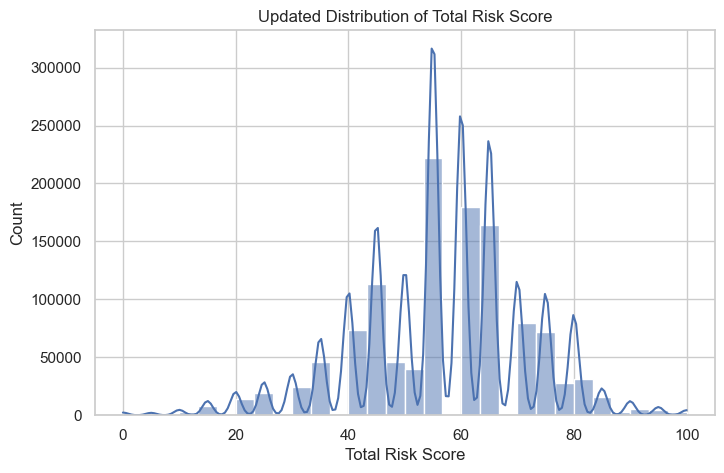

In [31]:
# Check the new distribution
print(data['Final_Risk_Category'].value_counts())

# Visualize the new risk score spread
plt.figure(figsize=(8, 5))
sns.histplot(data['Total_Risk_Score'], bins=30, kde=True)
plt.title("Updated Distribution of Total Risk Score")
plt.xlabel("Total Risk Score")
plt.ylabel("Count")
plt.show()

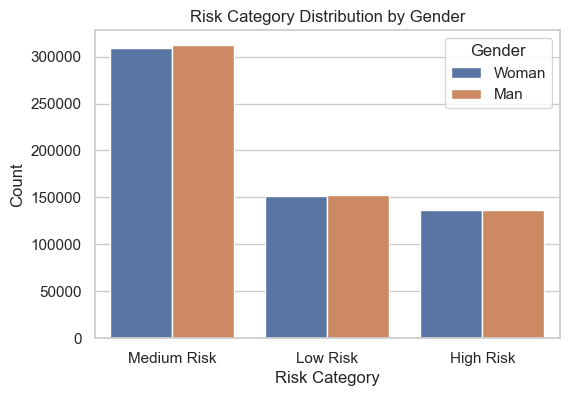

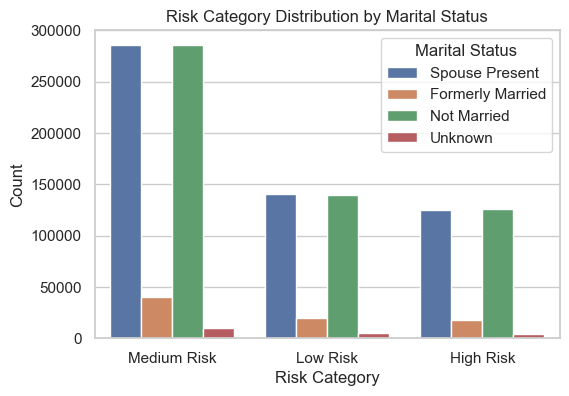

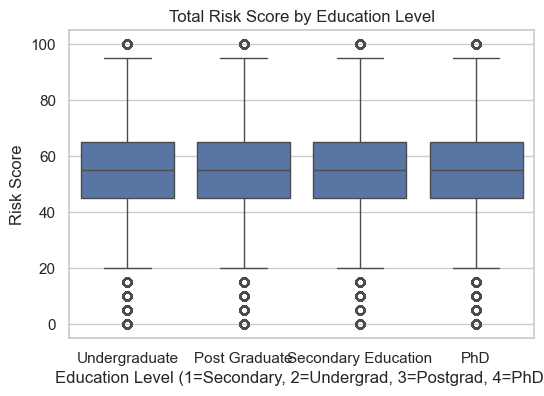

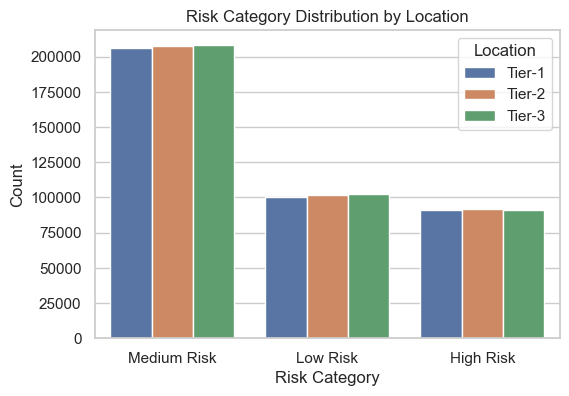

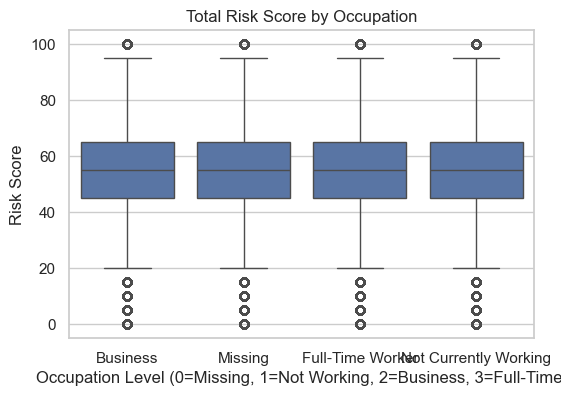

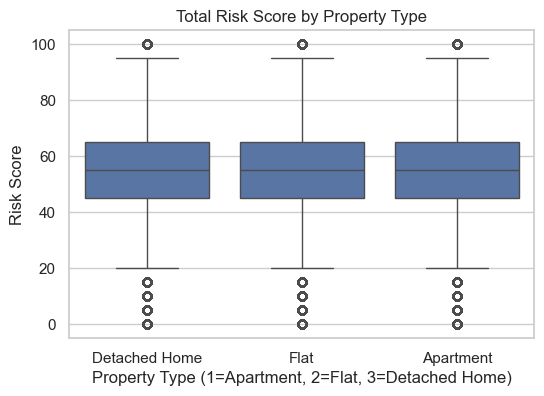

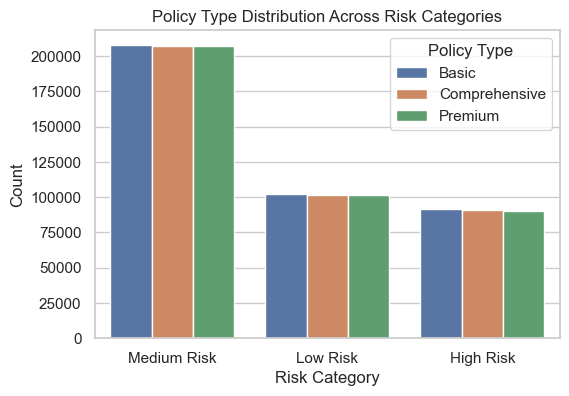

In [32]:
# Set plot style
sns.set(style="whitegrid")

# 1. Gender Distribution Across Risk Segments
plt.figure(figsize=(6, 4))
sns.countplot(x="Final_Risk_Category", hue="Gender", data=data)
plt.title("Risk Category Distribution by Gender")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.legend(title="Gender", labels=["Woman", "Man"])
plt.show()

# 2. Marital Status vs. Risk Category
plt.figure(figsize=(6, 4))
sns.countplot(x="Final_Risk_Category", hue="Marital Status", data=data)
plt.title("Risk Category Distribution by Marital Status")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.legend(title="Marital Status")
plt.show()

# 3. Education Level Impact on Risk
plt.figure(figsize=(6, 4))
sns.boxplot(x="Education Level", y="Total_Risk_Score", data=data)
plt.title("Total Risk Score by Education Level")
plt.xlabel("Education Level (1=Secondary, 2=Undergrad, 3=Postgrad, 4=PhD)")
plt.ylabel("Risk Score")
plt.show()

# 4. Location vs. Risk Category
plt.figure(figsize=(6, 4))
sns.countplot(x="Final_Risk_Category", hue="Location", data=data)
plt.title("Risk Category Distribution by Location")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.legend(title="Location")
plt.show()

# 5. Occupation vs. Risk Score
plt.figure(figsize=(6, 4))
sns.boxplot(x="Occupation", y="Total_Risk_Score", data=data)
plt.title("Total Risk Score by Occupation")
plt.xlabel("Occupation Level (0=Missing, 1=Not Working, 2=Business, 3=Full-Time)")
plt.ylabel("Risk Score")
plt.show()

# 6. Property Type Analysis
plt.figure(figsize=(6, 4))
sns.boxplot(x="Property Type", y="Total_Risk_Score", data=data)
plt.title("Total Risk Score by Property Type")
plt.xlabel("Property Type (1=Apartment, 2=Flat, 3=Detached Home)")
plt.ylabel("Risk Score")
plt.show()

# 7. Policy Type Selection by Risk Category
plt.figure(figsize=(6, 4))
sns.countplot(x="Final_Risk_Category", hue="Policy Type", data=data)
plt.title("Policy Type Distribution Across Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.legend(title="Policy Type", labels=["Basic", "Comprehensive", "Premium"])
plt.show()

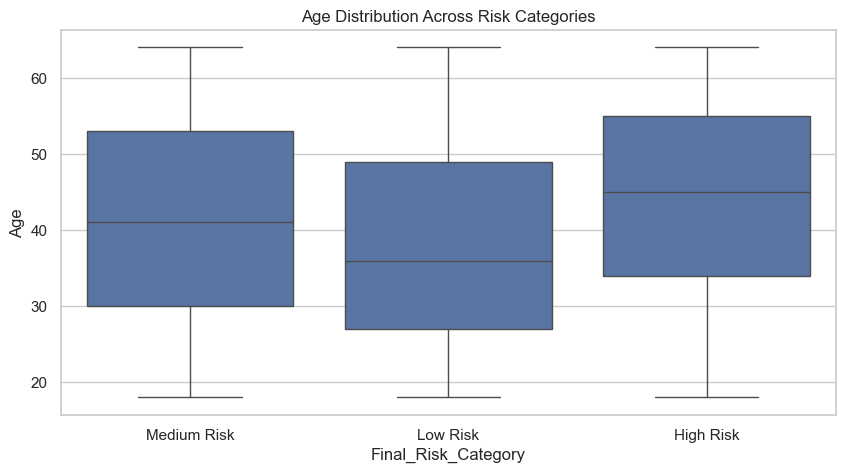

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Final_Risk_Category", y="Age", data=data)
plt.title("Age Distribution Across Risk Categories")
plt.show()


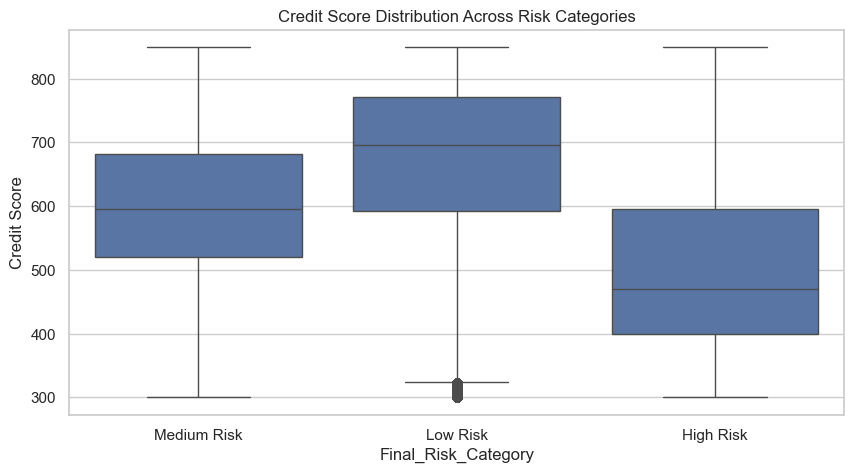

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Final_Risk_Category", y="Credit Score", data=data)
plt.title("Credit Score Distribution Across Risk Categories")
plt.show()


In [36]:
data['Total_Risk_Score'] = (data['Health_Risk_Score'] * 0.4 +  
                             data['Financial_Risk_Score'] * 0.3 +  
                             data['Lifestyle_Risk_Score'] * 0.2 +  
                             data['Age_Risk_Score'] * 0.1)
